In [3]:
%load_ext autoreload
%autoreload 2

from pyspark.sql import SparkSession

spark = SparkSession. \
    builder. \
    appName('my-demo-spark-job'). \
    getOrCreate()

spark = spark.newSession()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set("spark.databricks.delta.schema.autoMerge.enabled", "true")


import numpy as np
import pandas as pd
from pyspark.sql.types import *
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from pyspark.sql.functions import pandas_udf
from pyspark.sql.functions import PandasUDFType
import mplfinance as mpf
from pyspark.sql.functions import explode
from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from delta.tables import *
import random
from imports import *
import patternsearch
df = spark.read.format("delta").load("/Users/bowles/stocks/delta2")
# from add_feature import pattern_search
dates = df.select("Date").distinct().toPandas()['Date'].tolist()
tickers = df.select("ticker").distinct().toPandas()['ticker'].tolist()

ModuleNotFoundError: No module named 'imports'

In [6]:
import datetime as dt 
str(dt.datetime.now().date())

'2022-12-13'

In [58]:
date = '2022-12-12'
ticker = 'COST'
datedf = df.filter(f"Date == '{date}' AND ticker == '{ticker}'").select('*').toPandas()

In [65]:
datedf.sort_values('Datetime'),.

,Datetime,Timestamp,Volume,Date,Close,Close_o,Low,Low_o,High,High_o,...,gauss2,gauss4,gauss5,gauss6,gauss7,gauss8,gauss9,gauss16,gauss10,ticker
136,2022-12-12 15:00:00,1.670857e+09,4285.0,2022-12-12,-0.367748,482.2201,-0.367748,482.2201,-0.287190,482.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
111,2022-12-12 15:01:00,1.670857e+09,5612.0,2022-12-12,-0.390496,482.1100,-0.413223,482.0000,-0.293388,482.580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
223,2022-12-12 15:02:00,1.670857e+09,14710.0,2022-12-12,-0.444215,481.8500,-0.485537,481.6500,-0.332645,482.390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
112,2022-12-12 15:03:00,1.670857e+09,5191.0,2022-12-12,-0.429752,481.9200,-0.442149,481.8600,-0.355372,482.280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
30,2022-12-12 15:04:00,1.670857e+09,1122.0,2022-12-12,-0.442149,481.8600,-0.442149,481.8600,-0.413223,482.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2022-12-12 20:55:00,1.670878e+09,18125.0,2022-12-12,0.739669,487.5800,0.690083,487.3400,0.774793,487.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
359,2022-12-12 20:56:00,1.670879e+09,16693.0,2022-12-12,0.768595,487.7200,0.733471,487.5500,0.777893,487.765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
57,2022-12-12 20:57:00,1.670879e+09,28363.0,2022-12-12,0.719008,487.4800,0.717975,487.4750,0.770661,487.730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST
84,2022-12-12 20:58:00,1.670879e+09,35805.0,2022-12-12,0.770248,487.7280,0.723140,487.5000,0.772727,487.740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COST


In [46]:

def getranges():
    n = 0
    while 1:
        n += 1
        datest = [date for date in dates if '2022' in date]
        date = random.choice(datest)
        ticker = random.choice(tickers)
        print(date)
        datedf = df.filter(f"Date == '{date}' AND ticker == '{ticker}'").select('*').toPandas()
        datedf = datedf.sort_values(by='Timestamp')
        rangelist = patternsearch.find_values5(datedf['Close'].tolist())
        for r in rangelist:
            print('n' + str(n))
            n = 0
            print(r.start, r.end)
            # print([(result.results['gain'], result.results['i_when_leave']) for result in r])
            if r.fittedslope < 0:
                continue
            yield datedf, datedf['Close'].tolist()[r.start:r.end ], r.start, r.end, r

    
getr = getranges()
records=[]
# datedf, rr, i, i2, r = next(getr)
# plt.plot(datedf['Close'].tolist()[i:i2])
# plt.plot(gaussian_filter(datedf['Close'].tolist()[i:i2], 3))
# plt.plot(range(72, 72 + 20) , datedf['Close'].tolist()[i2:(i2 + 20)], 'r')
# print('coef' + str(r.fittedslope))
# print('residual' + str(r.residuals_mean))

In [135]:
%timeit patternsearch.find_values5(datedf['Close'].tolist())

85 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
np.mean(records)

0.5357786994329269

In [21]:
getr = getranges()

2022-02-24
2022-02-08
n2
139 239
2022-02-08 139 239
gain[-0.009407381888611122, 0.3374713118320989, -0.16685532184620144, 0.18711244965645935, -0.5122080199584144]
coef0.0001540390379711431
residual0.08157543693861616
1.0687810991292905
(1.113612651694042, 1.1806051287683268, 0.06699247707428468)
(1.1806051287683268, 0, ['2022-02-08', 0, 239, 0.06699247707428468, 0.06699247707428468])


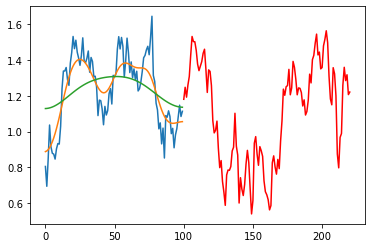

In [56]:
datedf, rr, i, i2, r = next(getr)


 # ['2022-08-31', 61, 133
print(datedf['Date'].tolist()[0], i, i2)
# print('slopes' + str([r.results['overall_slope'] for r in r.ranges]))
print('gain' + str([r.results['gain'] for r in r.ranges]))

plt.plot(datedf['Close'].tolist()[i:i2])
plt.plot(gaussian_filter(datedf['Close'].tolist()[i:i2], 6))
plt.plot(gaussian_filter(datedf['Close'].tolist()[i:i2], 18))

add = len(datedf) - i2
plt.plot(range(100, (len(datedf['Close'].tolist()[i2:])) + 100), datedf['Close'].tolist()[i2:], 'r')
print('coef' + str(r.fittedslope))
print('residual' + str(r.residuals_mean))
# maxr= max(datedf['Close'].tolist()[i2:]) - datedf['Close'].tolist()[i2]
print(get_max_value(datedf, i2, r))
records.append(maxr)

In [18]:
def get_max_value(datedf, i2, r):
    
    bought = datedf['Close'].tolist()[i2-1]
    next65 = datedf['Close'].tolist()[i2:(i2 + 30)]
    mi = float('inf')
    gauss3 = gaussian_filter(datedf['Close'].tolist()[:(i2-1)], 3)
    
    for i, price in enumerate(next65):
        print(gauss3[-1])
        print((bought, price, price - bought))                        
        mi = min(mi, price - bought)
        if (price - bought) > 0.10:
            return price, i, [datedf['Date'].tolist()[0], i, i2, mi, price - bought]

        if (price - gauss3[-1] ) <  r.residuals_mean*3:
            return price, i, [datedf['Date'].tolist()[0], i, i2, mi, price - bought]

    return price, i, [datedf['Date'].tolist()[0], i, i2, mi, price - bought]

In [236]:
# If its spiralling down right away and has exceeded multiple of avg residual, exit

In [ ]:
ii = 0
while ii < 30:
    
    datedf, rr, i, i2, r = next(getr)
    bought = datedf['Close'].tolist()[i2]
    sold = max(datedf['Close'].tolist()[i2:(i2 + 65)])
    print(bought, sold, sold - bought)
    print(i)
    ii += 1

StopIteration: 

In [56]:
getr = getranges()
def testout():
    returns = []
    while len(returns) < 30:

        datedf, rr, i, i2, r = next(getr)
        if r.fittedslope < 0:
            continue
        bought = datedf['Close'].tolist()[i2]
        next65 = datedf['Close'].tolist()[i2:(i2 + 65)]
        mi = float('inf')
        for n in next65:
            mi = min(mi, n - bought)
            if (n - bought) > 0.15:
                print(n - bought)
                returns.append([datedf['Date'].tolist()[0], i, i2, mi, n - bought])
                break
            
            if (n - bought ) < -1:
                returns.append([datedf['Date'].tolist()[0], i, i2, mi, n - bought])
                break
        else:
            returns.append([datedf['Date'].tolist()[0], i, i2, mi, n - bought])
    return returns

out= [testout() for _ in range(3)]




n2
165 237
0.34757766932508893
n3
167 239
n3
404 476
n5
69 141
0.19550898203592637
n1
265 337
0.17817371937639903
n1
265 337
0.17817371937639903
n3
146 218
n2
165 237
0.34757766932508893
n1
268 340
0.15236160487557715
n2
235 307
n1
265 337
0.17817371937639903
n1
32 104
n2
130 202
n6
104 176
n2
269 341
n4
304 376
n10
497 569
n1
210 282
n5
101 173
n2
247 319
n3
342 414
n8
34 106
0.20806722689075818
n3
244 316
n1
235 307
n2
262 334
n6
112 184
n4
342 414
n2
34 106
0.20806722689075818
n1
464 536
n3
340 412
n6
167 239
n11
106 178
n1
1 73
n6
404 476
n7
169 241
n4
169 241
n1
32 104
n5
95 167
n1
244 316
n1
393 465
n4
210 282
n3
89 161
n10
69 141
0.19550898203592637
n2
210 282
n4
167 239
n8
165 237
0.34757766932508893
n3
22 94
n0
388 460
n3
130 202
n1
238 310
0.1944954128440477
n9
340 412
n8
422 494
n3
6 78
0.17154811715481033
n3
497 569
n2
120 192
n3
393 465
n1
34 106
0.20806722689075818
n2
265 337
0.17817371937639903
n4
403 475
n7
342 414
n11
127 199
n2
404 476
n3
221 293
n5
265 337
0.17817371

In [57]:
[np.mean([i[-1] for i in o]) for o in out]

[-0.025954990037819002, -0.047562844875644675, -0.12307949694627103]

In [31]:
out[4]

[[['2022-04-20', 17, 89, 0.0, 0.0],
  ['2022-09-20', 248, 320, 0.0, 0.0],
  ['2022-01-24', 162, 234, 0.0, 0.0],
  ['2022-01-24', 250, 322, 0.0, 0.0],
  ['2022-06-01', 288, 360, 0.0, 0.0],
  ['2022-04-05', 23, 95, 0.0, 0.0],
  ['2022-04-05', 161, 233, 0.0, 0.0],
  ['2022-04-05', 366, 438, 0.0, 0.0],
  ['2022-08-16', 293, 365, 0.0, 0.0],
  ['2022-04-22', 72, 144, 0.0, 0.0],
  ['2022-04-22', 321, 393, 0.0, 0.0],
  ['2022-05-31', 63, 135, 0.0, 0.0],
  ['2022-11-28', 207, 279, 0.0, 0.0],
  ['2022-08-10', 224, 296, 0.0, 0.0],
  ['2022-06-14', 71, 143, 0.0, 0.0],
  ['2022-08-26', 120, 192, 0.0, 0.0],
  ['2022-04-20', 17, 89, 0.0, 0.0],
  ['2022-06-14', 71, 143, 0.0, 0.0],
  ['2022-03-02', 230, 302, 0.0, 0.0],
  ['2022-03-02', 323, 395, 0.0, 0.0],
  ['2022-09-07', 263, 335, 0.0, 0.0],
  ['2022-01-19', 138, 210, 0.0, 0.0],
  ['2022-01-19', 301, 373, 0.0, 0.0],
  ['2022-01-19', 452, 524, 0.0, 0.0],
  ['2022-05-03', 103, 175, 0.0, 0.0],
  ['2022-01-07', 123, 195, 0.0, 0.0],
  ['2022-03-02', 230, 

In [288]:
returns

[['2022-05-04', 194, 266, 0.33005642900238025],
 ['2022-10-11', 150, 222, 0.13319940606166775],
 ['2022-05-27', 178, 250, 0.10898977751053085],
 ['2022-11-07', 38, 110, -0.06959657426189303],
 ['2022-12-02', 122, 194, 0.11404405979544341],
 ['2022-01-11', 180, 252, 0.11114639568117586],
 ['2022-08-19', 83, 155, 0.10204434605140822],
 ['2022-09-19', 32, 104, 0.10695473251028292],
 ['2022-10-18', 69, 141, 0.14651999503742408],
 ['2022-07-26', 195, 267, 0.1302234054867375],
 ['2022-07-26', 394, 466, 0.5286105644943491],
 ['2022-06-21', 52, 124, 0.13290486392129175],
 ['2022-10-18', 69, 141, 0.14651999503742408],
 ['2022-02-10', 55, 127, -0.25702888760212894],
 ['2022-06-07', 29, 101, 0.1278656643853584],
 ['2022-10-13', 54, 126, 0.208684841488322],
 ['2022-10-11', 150, 222, 0.13319940606166775],
 ['2022-10-17', 161, 233, 0.13362068965517326],
 ['2022-03-18', 19, 91, 0.10224948875256024],
 ['2022-06-21', 52, 124, 0.13290486392129175],
 ['2022-07-07', 96, 168, 0.10957470662979783],
 ['2022-

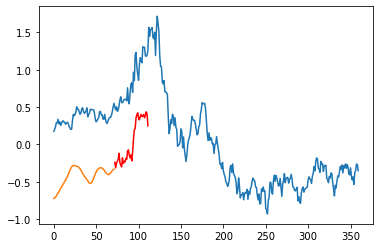

In [24]:
plt.plot(datedf['Close'].tolist()[:i2])
plt.plot(gaussian_filter(datedf['Close'].tolist()[i:i2], 3))
plt.plot(range(72, 72 + 40) , datedf['Close'].tolist()[i2:(i2 + 40)], 'r')

In [94]:
print(i, i2)

306 378


In [8]:
rangets = patternsearch.RangeSet()
patternsearch.look_for_up_down_pattern3(r.rawdata_o, rangets)

At 5, Range is currently 0. Moving to next one
At 23, Range is currently 1. Moving to next one
At 38, Range is currently 2. Moving to next one
At 50, Range is currently 3. Moving to next one
success


True

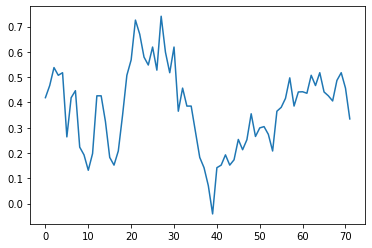

In [21]:
plt.plot(rangets.rawdata_o)

In [ ]:
ranges.rawdata_o = rawdata_o
rawdata_r = list(reversed(rawdata_o))

ranges.fittedslope = np.polyfit(range(len(rawdata_o)), rawdata_o,  1)[0]
rawdata_r_sm = gaussian_filter(rawdata_r, 3)
ranges.residuals = np.absolute(np.array(rawdata_r).squeeze() - np.array(rawdata_r_sm).squeeze())
ranges.residuals_mean = np.mean(ranges.residuals)

model_out = flatten(rawdata_r_sm)
rawdata_r_sm_res = - model_out.delta
ranges.coef = model_out.beta
slopes_rawdata_r_sm_res = get_slopes(rawdata_r_sm_res)
assert len(slopes_rawdata_r_sm_res) == len(rawdata_r_sm_res) - 1, 'len slopes is ' + str(len(slopes_rawdata_r_sm_res))

success = True
i = 0
iters_in_range = 0
cur_range_i = 0
N = len(slopes_rawdata_r_sm_res)

switched_inds = []
ranges.slopes_rawdata_r_sm_res = slopes_rawdata_r_sm_res
ranges.rawdata_r_sm_res = rawdata_r_sm_res

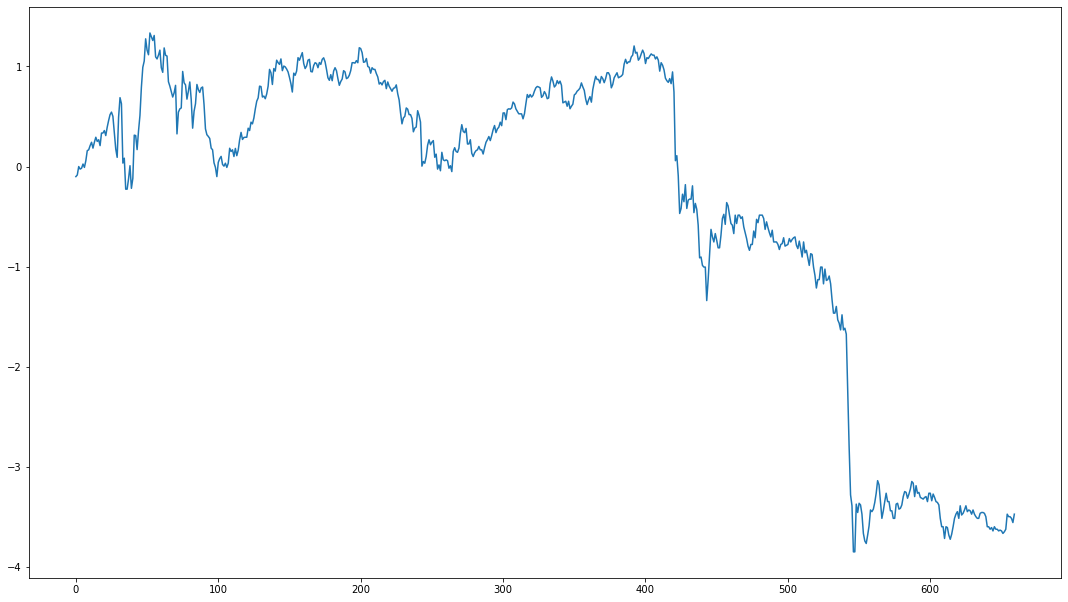

In [199]:
plt.plot(datedf['Close'].tolist())
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

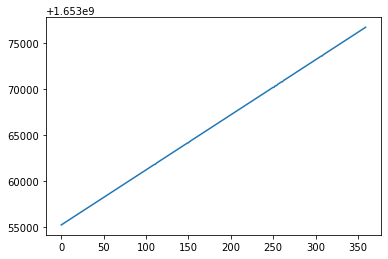

In [249]:
plt.plot(datedff['Timestamp'].tolist())

In [211]:
print(fir)

[-5.170590848511767, -5.324744557974239, -4.915148822745441, -5.065304309195912, -5.188804975566423, -4.95868502887605, -3.161705908485121, -2.8729453576188395, -1.494224788982684, -1.657041314971132, -1.4195024433585062, -1.6803642825410847, -1.6437139049311418, -1.8214127054642382, -2.4233673922701104, -2.4248111950244327, -2.879164815637492, -3.244780097734339, -3.4686805864060384, -3.3762772101288316, -3.511106175033312, -3.80297645490893, -4.476899155930702, -4.458018658374052, -4.458018658374052, -4.432696579298098, -4.5855175477565435, -4.9604620168813796, -5.016437139049315, -5.2154597956463835, -5.146157263438479, -5.203909373611722, -4.710350955131061, -5.159484673478448, -5.189693469569088, -5.227343402932031, -4.942247889826744, -5.097734340293203, -5.156374944469132, -4.794757885384266, -4.35717458907152, -4.342070191026201, -3.6916925810750736, -3.361617059084854, -1.3565748556197317, -1.7192358951576996, -1.6815859617947562, -1.642825410928477, -1.6212794313638335, -1.52

In [265]:
def test():
    records = []
    i = 0
    getr = getranges()
    while len(records) < 30:
        datedf, rr, i, i2 = next(getr)
        fir, sec = rr[:-20], rr[-20:]
        add = sec[-1] - fir[-1]
        records.append(add)
        i += 1
    print('result')
    return records
        
    
rr = [test() for _ in range(5)]

255 327
77 149
156 228
229 301
77 149
123 195
255 327
123 195
240 312
38 110
163 235
340 412
156 228
48 120
212 284
223 295
340 412
28 100
223 295
28 100
47 119
77 149
123 195
36 108
123 195
28 100
48 120
212 284
225 297
37 109
result
225 297
77 149
28 100
28 100
225 297
62 134
340 412
123 195
156 228
36 108
225 297
206 278
225 297
77 149
240 312
37 109
77 149
340 412
47 119
37 109
240 312
266 338
62 134
36 108
206 278
123 195
62 134
206 278
255 327
37 109
result
240 312
77 149
246 318
255 327
225 297
255 327
206 278
36 108
246 318
37 109
63 135
28 100
156 228
123 195
223 295
246 318
48 120
212 284
340 412
225 297
229 301
246 318
92 164
229 301
38 110
163 235
123 195
47 119
36 108
246 318
result
266 338
38 110
163 235
246 318
63 135
340 412
47 119
223 295
255 327
225 297
37 109
92 164
266 338
123 195
240 312
255 327
255 327
37 109
225 297
266 338
28 100
240 312
255 327
340 412
47 119
340 412
47 119
47 119
255 327
77 149
result
92 164
255 327
246 318
206 278
266 338
77 149
229 301
47 11

In [267]:
[np.mean(r) for r in rr]

[-0.10486126513035696,
 -0.08189860361487565,
 -0.05778695374815602,
 -0.06756731283920235,
 -0.07834827517071467]

2020-01-22


/Users/bowles/stocks/helpers.py:74: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax[0].plot(datedf[extracolumn], 'ko', marker='.', markersize=1)


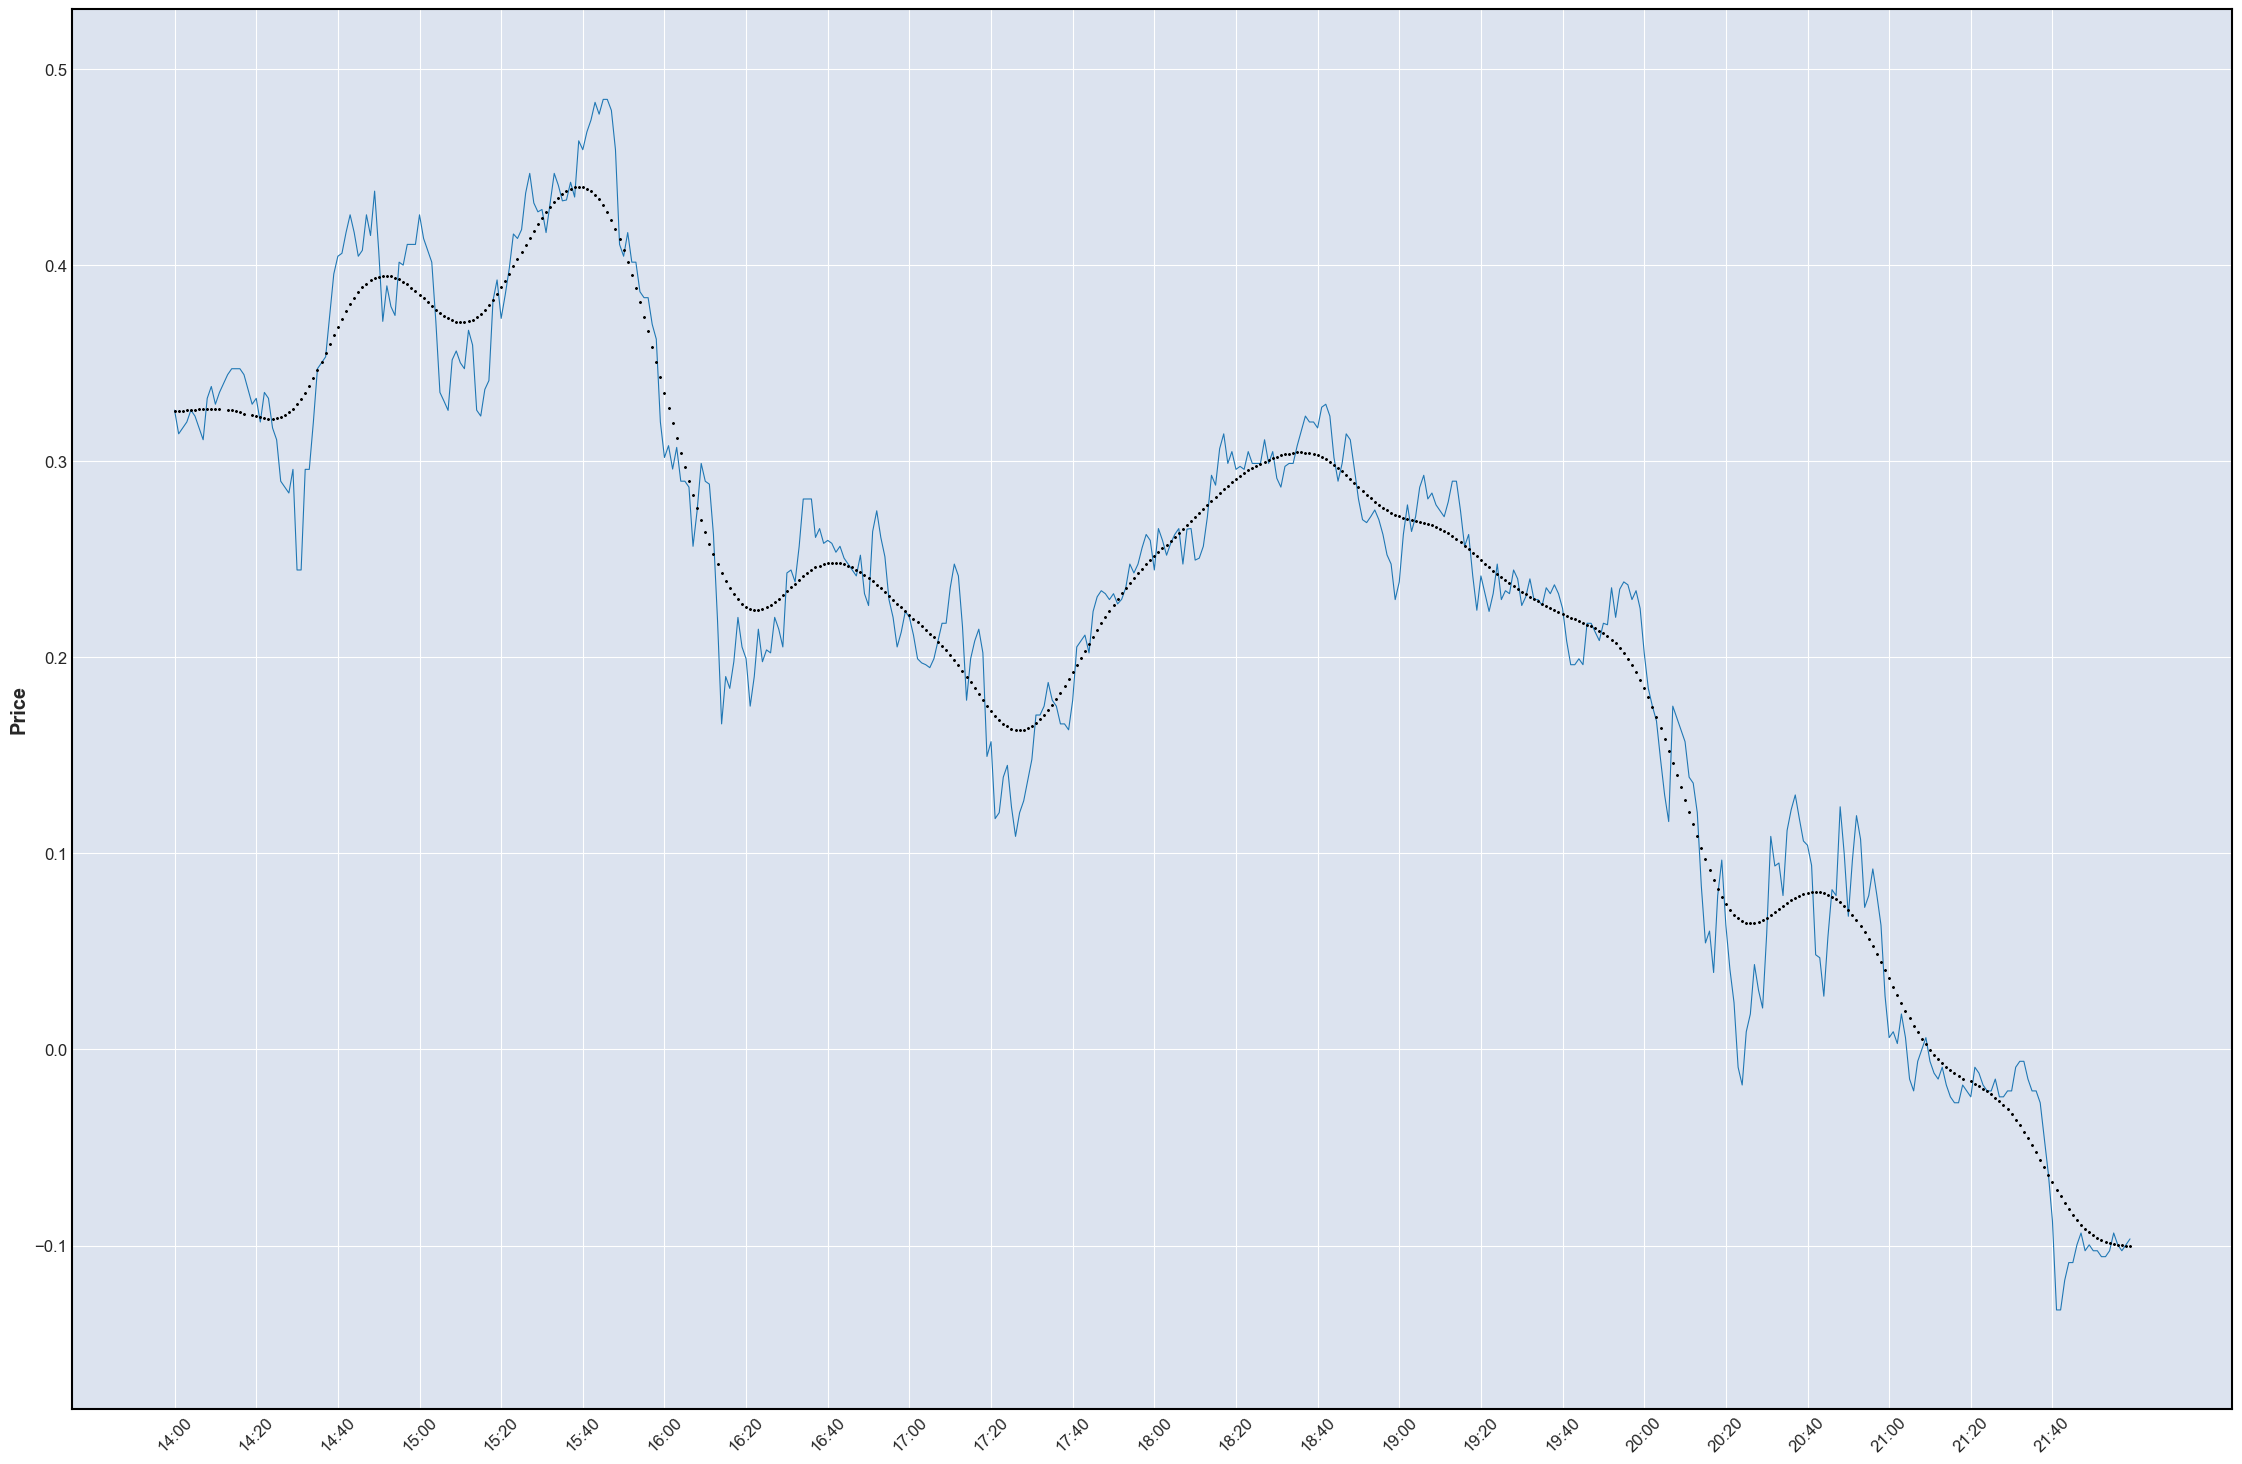

In [43]:
from helpers import *

graph_day(random_datedf('SPY'), 'gauss9')

In [66]:
dates = df.select("Date").distinct().toPandas()['Date'].tolist()

date = random.choice(dates) 
datedf = df.filter(f"Date == '2013-01-29' AND ticker == 'SPY'").select('*').toPandas()
datedf.set_index(pd.to_datetime(datedf['Datetime'],infer_datetime_format=True), inplace=True)
datedf.sort_index(inplace=True)
print(dates[0:10])

['2013-03-14', '2014-05-27', '2015-05-01', '2016-08-17', '2017-12-05', '2019-08-08', '2019-08-22', '2019-08-23', '2020-02-26', '2020-04-13']


2013-01-29 13:01:00
{'y1': array([-0.20680454, -0.20013342, -0.20013342, -0.20680454, -0.22014676,
       -0.14676451, -0.16010674, -0.14676451, -0.13342228, -0.14676451,
       -0.15010007, -0.15010007, -0.14676451, -0.15343562, -0.14676451,
       -0.14676451, -0.13342228, -0.11340894, -0.1400934 , -0.16677785,
       -0.17344897, -0.16010674, -0.17344897, -0.17344897, -0.18012008,
       -0.18012008, -0.18679119, -0.18679119, -0.18012008, -0.17344897,
       -0.17344897, -0.16677785, -0.16677785, -0.14676451, -0.14676451,
       -0.12008005, -0.11340894, -0.10006671, -0.10006671, -0.10006671,
       -0.07338225, -0.10006671, -0.08672448, -0.08672448, -0.08672448,
       -0.08672448, -0.08672448, -0.0933956 , -0.11340894, -0.11340894,
       -0.12675117, -0.12675117, -0.11340894, -0.12008005, -0.10673783,
       -0.13342228, -0.12675117, -0.12675117, -0.12008005, -0.13342228,
       -0.1400934 , -0.16010674, -0.14676451, -0.14676451, -0.12675117,
       -0.12675117, -0.13342228, -0.1

<ipython-input-25-03ee8946194a>:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax[0].plot(datedf['gauss9'], 'ko', marker='.', markersize=1)


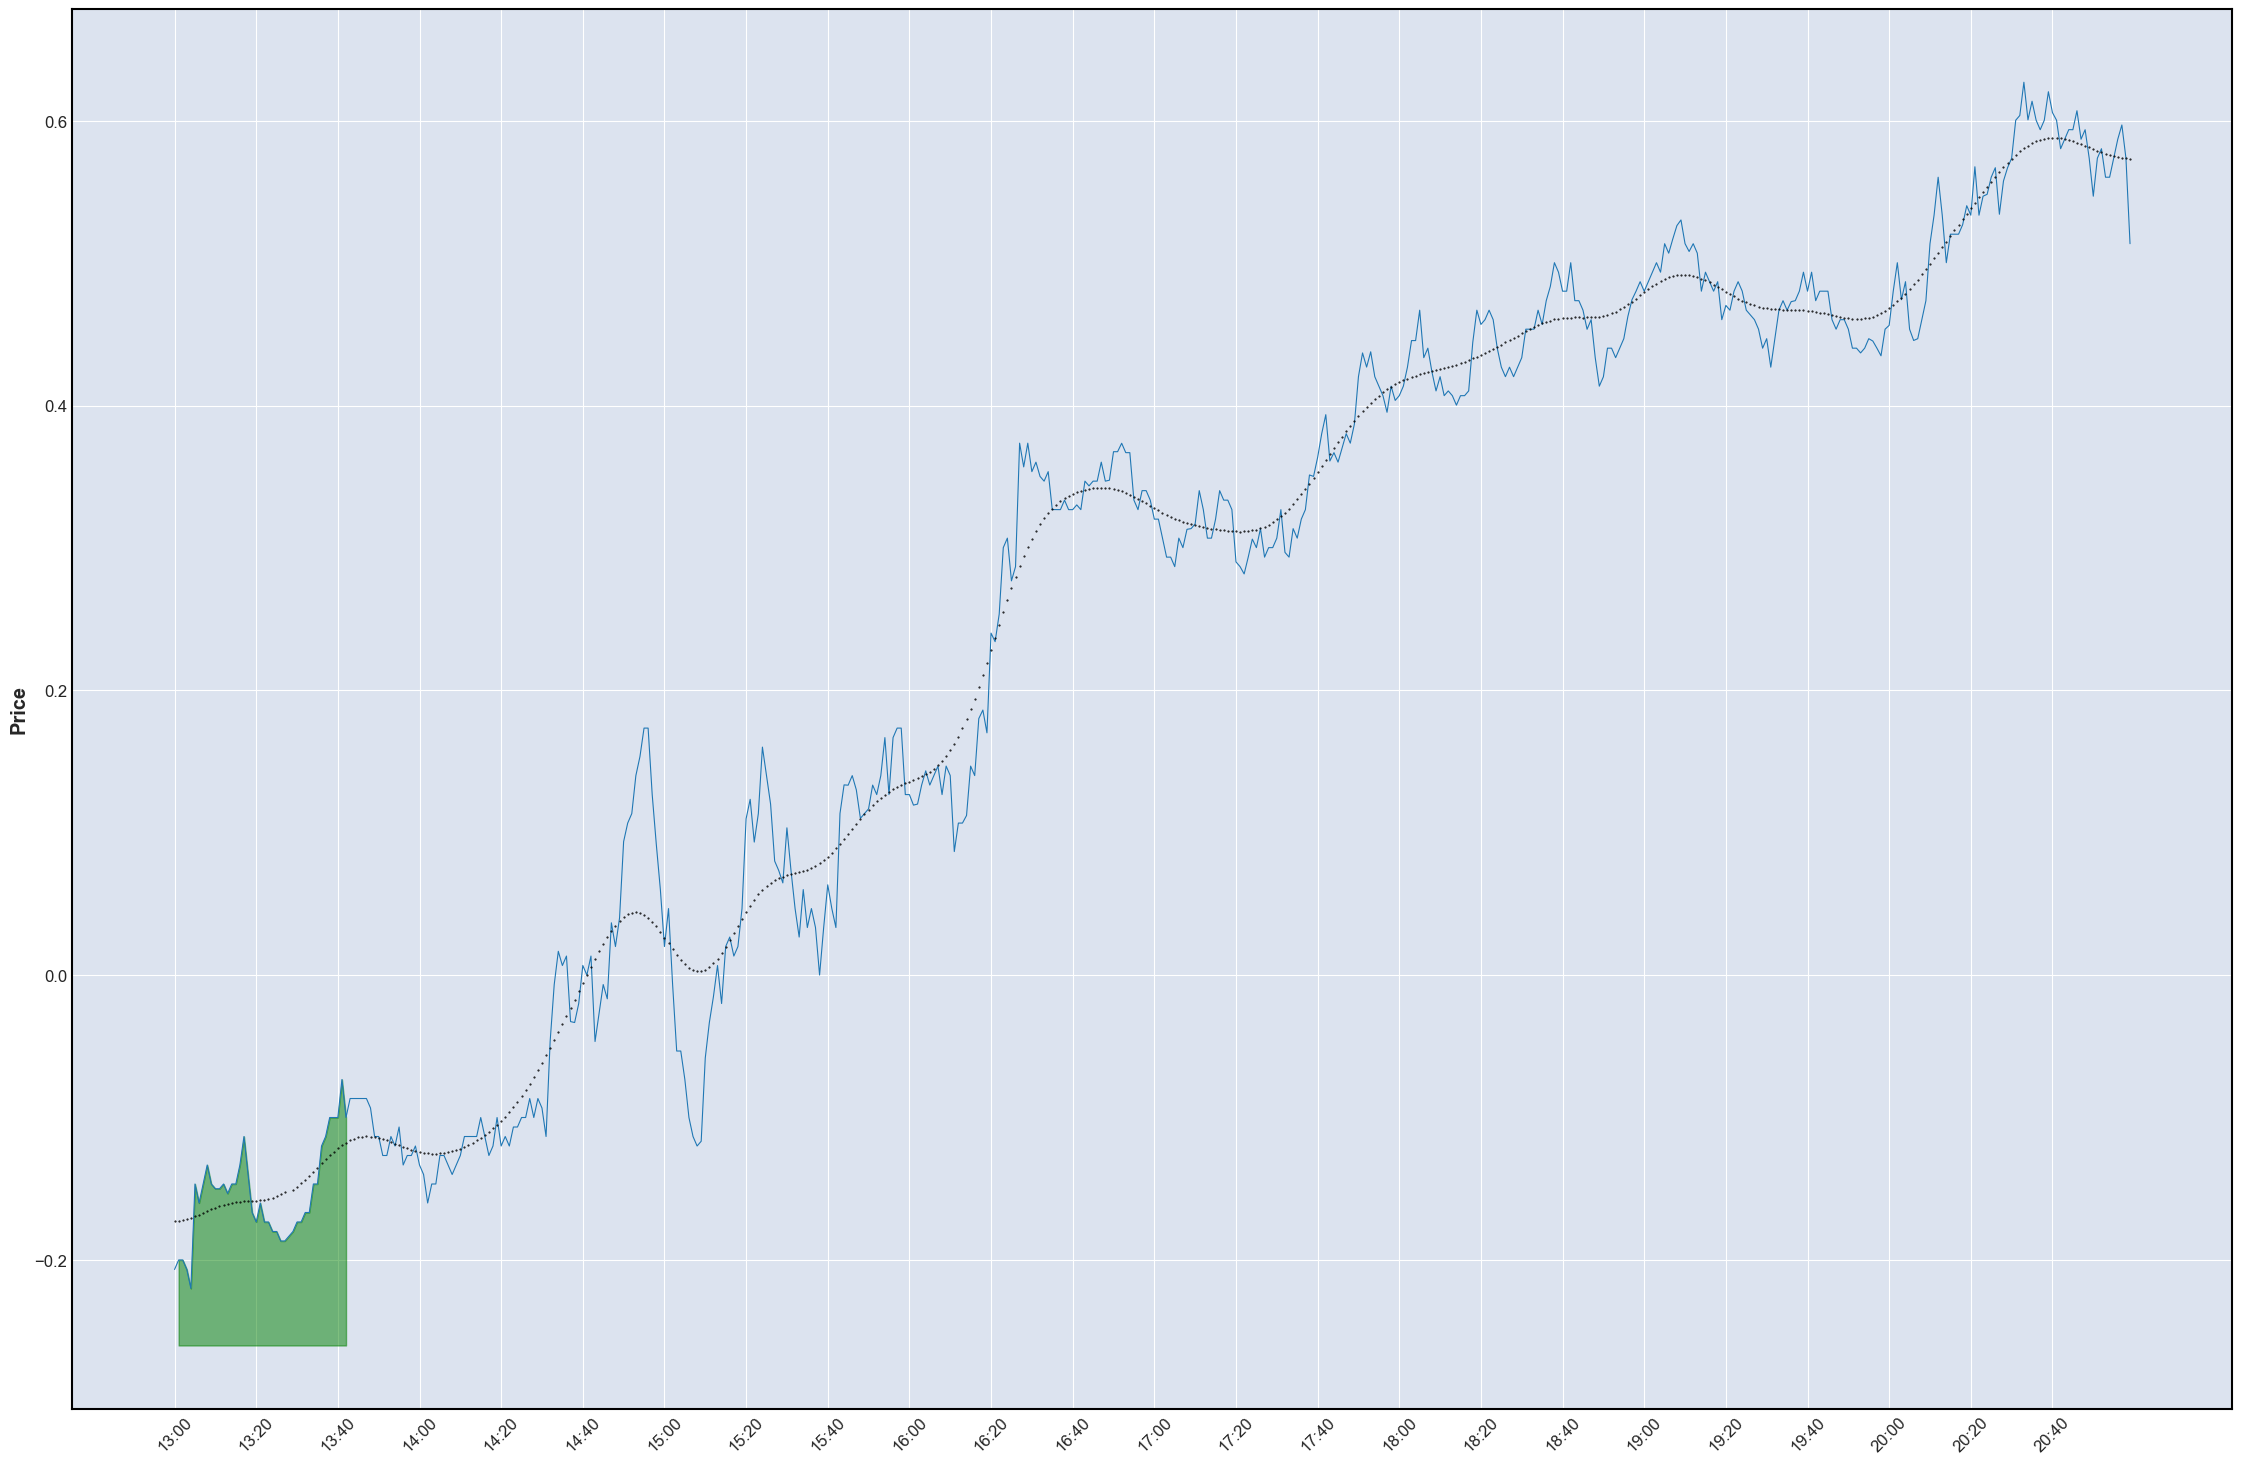

In [25]:
import mplfinance as mpf
from datetime import datetime

def getall_where_values(datedf, time_tuples):
    
    where_values = np.array([False]* len(datedf)) 
    for start_time, end_time in time_tuples:
        graphdf   = pd.DataFrame(datedf.index)
        where_values += pd.notnull(graphdf[ (graphdf>=start_time) & (graphdf <= end_time) ])['Datetime'].values

    return where_values


plt.style.use('ggplot')
def plot_fillin(datedf, start_time, end_time):
    
    if type(start_time) == int:
        start_time, end_time = datetime.utcfromtimestamp(start_time) ,datetime.utcfromtimestamp(end_time)
    print(start_time)
    y1values = datedf['Close'].values
    y2value  = datedf['Low'].min()
    
    where_values = getall_where_values(datedf, [(start_time, end_time)])
    fill_between=dict(y1=y1values,y2=y2value,where=where_values,alpha=0.5,color='g')
    print(fill_between)
    fig, axlis = mpf.plot(datedf,
                          type='line', 
                          figsize=(30, 20),  
                          fill_between=fill_between,
                          show_nontrading=True, 
                          returnfig=True)
    
    ticks = pd.date_range(min(datedf.index), max(datedf.index), freq='20T')
    _ = axlis[1].xaxis.set_ticks(ticks)
    return axlis



ax = plot_fillin(datedf, 1359464460, 1359466920)
ax[0].plot(datedf['gauss9'], 'ko', marker='.', markersize=1)


<ipython-input-28-83c98295020f>:42: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax[0].plot(datedf[extracolumn], 'ko', marker='.', markersize=1)


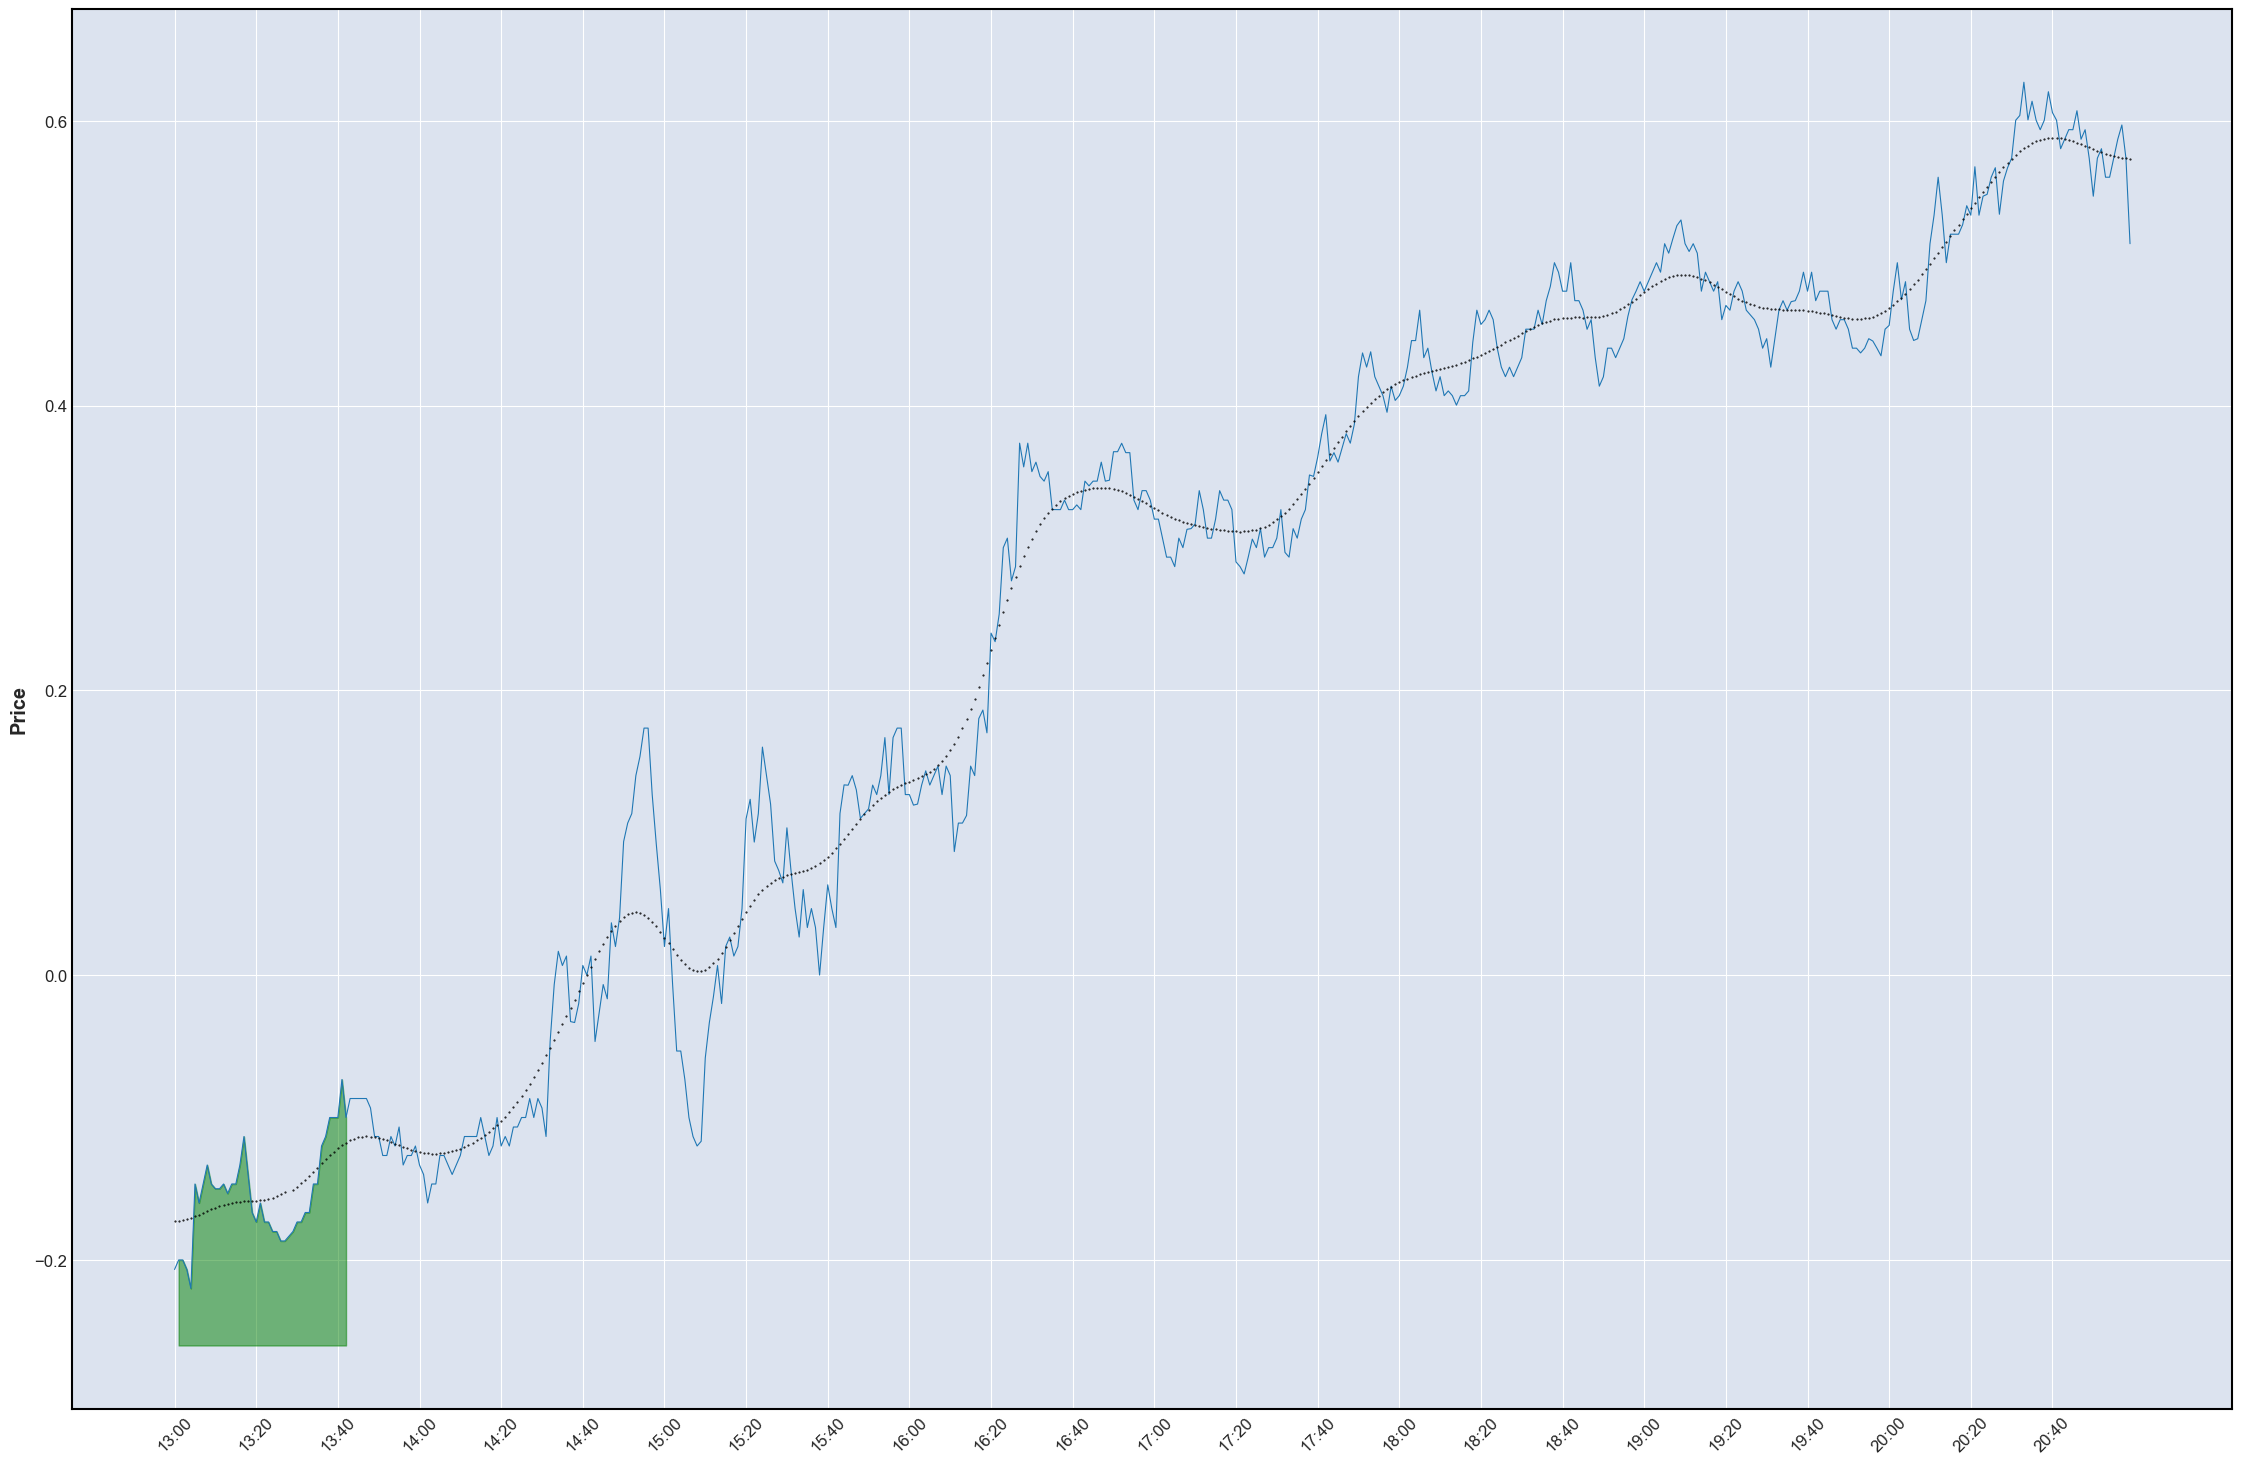

In [28]:



def graph_day(datedf, extracolumn, fillin=[]):
    import mplfinance as mpf
    from datetime import datetime

    def getall_where_values(datedf, time_tuples):

        where_values = np.array([False]* len(datedf)) 
        for start_time, end_time in time_tuples:
            if type(start_time) == int:
                start_time, end_time = datetime.utcfromtimestamp(start_time) ,datetime.utcfromtimestamp(end_time)
            graphdf   = pd.DataFrame(datedf.index)
            where_values += pd.notnull(graphdf[ (graphdf>=start_time) & (graphdf <= end_time) ])['Datetime'].values

        return where_values


    plt.style.use('ggplot')
    def plot_fillin(datedf, time_tuples):


        y1values = datedf['Close'].values
        y2value  = datedf['Low'].min()

        where_values = getall_where_values(datedf, time_tuples)
        fill_between=dict(y1=y1values,y2=y2value,where=where_values,alpha=0.5,color='g')
        fig, axlis = mpf.plot(datedf,
                              type='line', 
                              figsize=(30, 20),  
                              fill_between=fill_between,
                              show_nontrading=True, 
                              returnfig=True)

        ticks = pd.date_range(min(datedf.index), max(datedf.index), freq='20T')
        _ = axlis[1].xaxis.set_ticks(ticks)
        return axlis



    ax = plot_fillin(datedf, fillin)
        
    for cols in extracolumn:
        ax[0].plot(datedf[extracolumn], 'ko', marker='.', markersize=1)

        
graph_day(datedf, extracolumn=['gauss9'], fillin=[(1359464460, 1359466920)])

In [12]:
def func(df):
    stream = False
    backwards_tip = df.tail(40)[::-1]
    index, first_row = next(backwards_tip.iterrows())
    rows = [first_row]
    
    for cnt, (index, row) in enumerate(backwards_tip.iterrows()):
        
        if row['gauss9'] > rows[-1]['gauss9']:
            return False
        
        rows.append(row)
        
    return True
    


def add_feature_udf(pdf):

    pdf = pdf.sort_values(by='Timestamp')
    dt, close = pdf["Timestamp"], pdf["Close"]
    assert sorted(dt.tolist()) == dt.tolist()

    items = []
    rows = pdf.iterrows()

    count = 0

    while count < len(pdf):

        if count > 40:
            if func(pdf.iloc[:count, :]):
                items.append({'start':  pdf.iloc[count-40, :]['Timestamp'],
                              'end':  pdf.iloc[count, :]['Timestamp']})
                count += 40

        count += 1

import numpy as np
import pandas as pd
from pyspark.sql.types import *
import pandas as pd

from pyspark.sql.functions import pandas_udf
from pyspark.sql.functions import PandasUDFType
import mplfinance as mpf
from pyspark.sql.functions import explode
from scipy.ndimage import gaussian_filter


from delta.tables import *
import random


def add_feature3(func, column_name, delta_path):
    
    from pyspark.sql import SparkSession

    spark = SparkSession. \
        builder. \
        master("local[*]"). \
        appName('my-demo-spark-job2'). \
        getOrCreate()

    spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
    spark.conf.set("spark.databricks.delta.schema.autoMerge.enabled", "true")


    deltaTable = DeltaTable.forPath(spark, delta_path)
    df = spark.read.format("delta").load(delta_path)

    @pandas_udf(f"Timestamp long, {column_name} double", PandasUDFType.GROUPED_MAP)
    def add_feature_udf(pdf):
        pdf = pdf.sort_values(by='Timestamp')
        dt, close = pdf["Timestamp"], pdf["Close"]
        assert sorted(dt.tolist()) == dt.tolist()
        pdf[column_name] = func(pdf)
        return pdf[['Timestamp', column_name]]


    newval = df.groupby("Date").apply(add_feature_udf)
    deltaTable.alias("oldData") \
      .merge(
        newval.alias("newData"),
        "oldData.Timestamp = newData.Timestamp") \
      .whenMatchedUpdateAll() \
      .execute()
    
    

    
column_name, delta_path = 'test', "/Users/bowles/stocks/delta2"


from pyspark.sql import SparkSession

spark = SparkSession. \
    builder. \
    master("local[*]"). \
    appName('my-demo-spark-job2'). \
    getOrCreate()

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set("spark.databricks.delta.schema.autoMerge.enabled", "true")


deltaTable = DeltaTable.forPath(spark, delta_path)
df = spark.read.format("delta").load(delta_path)

@pandas_udf(f"start long, end long", PandasUDFType.GROUPED_MAP)
def add_feature_udf(pdf):
    def func(pdf):
        stream = False
        backwards_tip = pdf.tail(40)[::-1]
        index, first_row = next(backwards_tip.iterrows())
        rows = [first_row]

        for cnt, (index, row) in enumerate(backwards_tip.iterrows()):

            if row['gauss9'] > rows[-1]['gauss9']:
                return False

            rows.append(row)

        return True

    
    items = []
    start = next(pdf.iterrows())[1]['Timestamp']
    end = None
    for rown, (index, row) in enumerate(pdf.iterrows()):
        if rown > 0:
            if func(pdf.iloc[:rown, :]):
                items.append({'start':  pdf.iloc[rown-40, :]['Timestamp'],
                              'end':  pdf.iloc[rown, :]['Timestamp']})

    return pd.DataFrame.from_records(items)

newval = df.groupby("Date").apply(add_feature_udf)
search_result = newval.toPandas()
# search_result['date'] = search_result['end'].apply(lambda x: str(datetime.utcfromtimestamp(x).date()))

# pattern_search('test', "/Users/bowles/stocks/delta2")

In [42]:
from add_feature import pattern_search2
df=pattern_search2(func, 'test', "/Users/bowles/stocks/delta2")

/Users/bowles/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/pandas/group_ops.py:98: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [43]:
df

,start,end,date
0,1359464460,1359466920,2013-01-29
1,1359468240,1359470640,2013-01-29
2,1359472080,1359474480,2013-01-29
3,1359474540,1359476940,2013-01-29
4,1359480060,1359482460,2013-01-29
...,...,...,...
9056,1659118020,1659120420,2022-07-29
9057,1659120480,1659122880,2022-07-29
9058,1664547240,1664549640,2022-09-30
9059,1665057540,1665059940,2022-10-06


In [13]:
from datetime import datetime
search_result['end'].apply(lambda x: str(datetime.utcfromtimestamp(x).date()))

In [32]:
[i[1] for i in list(search_result[search_result['date'] == datetime.strptime('2021-02-05', '%Y-%m-%d').date()].iterrows())[0:5]]

[start    1612530720
 end      1612531020
 date     2021-02-05
 Name: 3861, dtype: object,
 start    1612531020
 end      1612531620
 date     2021-02-05
 Name: 3862, dtype: object,
 start    1612531620
 end      1612531920
 date     2021-02-05
 Name: 3863, dtype: object,
 start    1612531920
 end      1612533660
 date     2021-02-05
 Name: 3864, dtype: object,
 start    1612533660
 end      1612533780
 date     2021-02-05
 Name: 3865, dtype: object]

In [16]:
datedf['Date'].tolist()[0]

'2021-02-05'

In [27]:
datetime.strptime('2021-02-05', '%Y-%m-%d').date()

datetime.date(2021, 2, 5)

In [25]:
search_result['date'].tolist()[0]

datetime.date(2013, 1, 29)

In [29]:
str(datetime.strptime('2021-02-05', '%Y-%m-%d').date())

'2021-02-05'

[0.0018011674919755638,
 0.0036311898704010637,
 0.005392451252374114,
 0.00682864208885961,
 0.007618580597042401,
 0.007543234461731635,
 0.006628182574908298,
 0.0051599543763024835,
 0.003565306992104056,
 0.0022433953277403995,
 0.0014148749563362428,
 0.00106387202452074,
 0.0009718500496885829,
 0.0008183177683846465,
 0.0003197311323857588,
 -0.0006401190472664076,
 -0.0019445070538874898,
 -0.0032920732530909436,
 -0.0043374847380905635,
 -0.004861499772748579,
 -0.004835155674944996,
 -0.004380333841270706,
 -0.0036549211529419423,
 -0.0027654359675563234,
 -0.0017490856088733242,
 -0.0006128992044001913,
 0.0006263073493311122,
 0.0019342999011225936,
 0.003271044685711877,
 0.004609998958362088,
 0.005920180344331116,
 0.007137532724307921,
 0.00814869860679951,
 0.008808729785050956,
 0.008992823498413599,
 0.008650022597437676,
 0.007832649386939602,
 0.006673958556494358,
 0.005342221464597077,
 0.003983829384780577,
 0.0026844477338375528,
 0.001459641707478962,
 0.0002

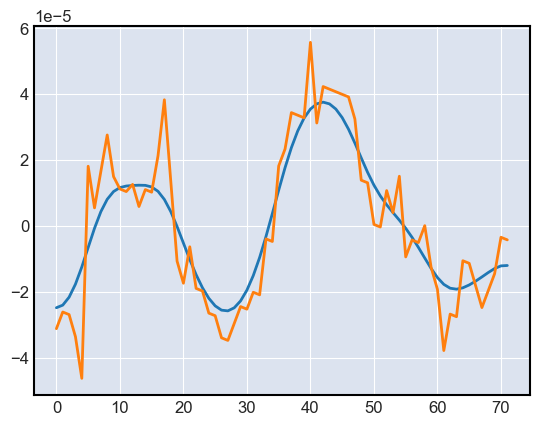

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# odr function from scipy package
# is used to perform ODR regression
from scipy import odr
import random as r


# create a target array of random numbers
target = datedf.iloc[:70,:]['gauss3']

def flatten(target):
    # Define a function (quadratic in our case)
    # to fit the data with.
    # odr initially assumes a linear function
    def target_function(p, x):
        m, c = p
        return m*x + c

    odr_model = odr.Model(target_function)

    data = odr.Data(range(len(target)), target)

    ordinal_distance_reg = odr.ODR(data, odr_model,
    beta0=[0.2, 1.])

    out = ordinal_distance_reg.run()
    return out.delta

# print the results
vals = gaussian_filter(datedf.iloc[:72,:]['Close'], 3)
plt.plot(flatten( vals))
plt.plot(flatten(datedf.iloc[:72,:]['Close']))

# get_slopes(vals)

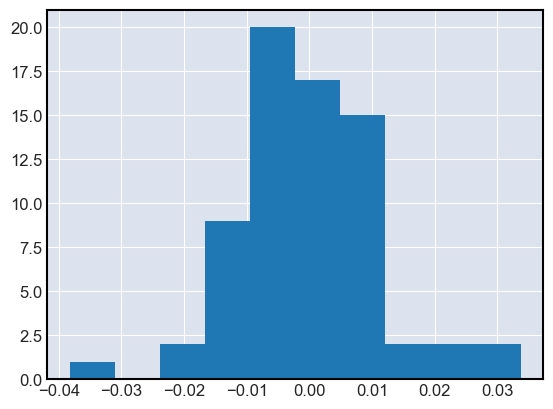

In [184]:
a= scipy.stats.kurtosis(res)

In [185]:
a

1.8720968166127294

In [186]:
def plot_with_slope(vals):
    
    regr = LinearRegression()
    X, y = np.array(range(len(vals))).reshape(-1, 1),  np.array(vals).reshape(-1, 1)
    # Train the model using the training sets
    regr.fit(X, y)

    pres = regr.predict(X)

    plt.scatter(X, y, color="black")
    plt.plot(X, pres, color="blue", linewidth=3)
    return model.coef_[0][0]


def get_slopes(vals):
    slopes = []
    for v in range(1, len(vals)):
        slopes.append(vals[v] - vals[v-1])
        
    return slopes

In [187]:
plt.plot(out.delta)


AttributeError: 'numpy.ndarray' object has no attribute 'delta'

In [202]:
# - must go down for 0.07-0.09
# - must go up for 0.15-0.30
# - must go down for  0.15-0.30
# - must go up for 0.15-0.30
# - must go down for  0.15-0.30

def test_vals(raw_values):
    
    
    vals_r = list(reversed(raw_values))
    slopes = get_slopes(raw_values)
    r_slopes = slopes[::-1]
    
    # assumes working from the last item in series
    r_ranges = [(0, 0.07, 0.15, '+'), (1, 0.15, 0.35, '-'), (2, 0.15, 0.35, '+'), (3, 0.15, 0.35, '-'), (4, 0.15, 0.35, '+')]
    
    range_adj = []
    for i, minp, maxp, direction in r_ranges:
        range_adj.append((i, math.floor(minp*len(vals_r)), math.floor(maxp*len(vals_r)), direction))
        
        
    success=True
    i = 0
    iters_in_range=0
    cur_range_i = 0
    while 1:
        current_range = range_adj[cur_range_i]
        current_slope = r_slopes[i]
        
        if i == (len(r_slopes) - 1):
            if cur_range_i != (len(range_adj) -1):
                print(f"You got to end of list ( i = {i} however, it appears you didnt get all ranges. cur_range_i is {cur_range_i}")
                success=False
                break
            elif iters_in_range < current_range[1]:
                print(f"You got to end of list and to the last range, but you didnt get enough in last range. iters_in_range was {iters_in_range} and you were supposed to get {current_range[2]}")
                success=False
                break
            else:
                break
                
                
        if not ((current_slope > 0 and current_range[-1] == '+') or (current_slope < 0 and current_range[-1] == '-')):

            if iters_in_range > current_range[1]: # success
                assert iters_in_range <= current_range[2], "assert iters_in_range <= current_range[=1]"
                if cur_range_i == (len(range_adj) - 1): # if 4 ranges, but is cur_range_i is 3, we're done
                    break
                else: # need to move to next range
                    print(f"At {i}, Range is currently " + str(cur_range_i) + ". Moving to next one")
                    cur_range_i += 1
                    iters_in_range = 0

            else:
                print(f"Incorrect slope was found at {str(i)}.  It was supposed to be  {current_range[-1]} but it was {current_slope}. \
                      . Current Range was + {str(current_range)} Range i was " + str(cur_range_i))
                success = False
                break           

        if iters_in_range > current_range[2]: # went over the allowable for a range
            print('Went over the allowed range')
            success = False
            break

        i += 1
        iters_in_range += 1
        
    return success
        
        
        
        

At 6, Range is currently 0. Moving to next one
At 27, Range is currently 1. Moving to next one
At 42, Range is currently 2. Moving to next one


In [327]:
success

True

In [143]:
list(zip(r_slopes[:30], range(30)))

NameError: name 'r_slopes' is not defined

In [144]:

def look_for_up_down_pattern(raw_values):
    
    vals_r = list(reversed(raw_values))
    slopes = get_slopes(raw_values)
    r_slopes = slopes[::-1]
    
    # assumes working from the last item in series
    r_ranges = [(0, 0.07, 0.09, '+'), (1, 0.15, 0.35, '-'), (2, 0.15, 0.35, '+'), (3, 0.15, 0.35, '-'), (4, 0.15, 0.35, '+')]
    
    range_adj = []
    for i, minp, maxp, direction in r_ranges:
        range_adj.append((i, math.floor(minp*len(vals)), math.floor(maxp*len(vals)), direction))
        
    success=True
    i = 0
    iters_in_range=0
    cur_range_i = 0
    
    switched_inds = []
    while 1:

        if i == (len(r_slopes) - 1):
            if cur_range_i != (len(range_adj) -1):
                print(f"You got to end of list ( i = {i} however, it appears you didnt get all ranges. cur_range_i is {cur_range_i}")
                success=False
                break
            elif iters_in_range < current_range[1]:
                print(f"You got to end of list and to the last range, but you didnt get enough in last range. iters_in_range was {iters_in_range} and you were supposed to get {current_range[2]}")
                success=False
                break
            else:
                print('success')
                break
                
        current_range = range_adj[cur_range_i]
        current_slope = r_slopes[i]
        
        if not ((current_slope > 0 and current_range[-1] == '+') or (current_slope < 0 and current_range[-1] == '-')):
            
            if iters_in_range > current_range[1] and iters_in_range <= current_range[2]: # success
                assert iters_in_range <= current_range[2], "assert iters_in_range <= current_range[=1]"
 
                if cur_range_i == (len(range_adj) - 1): # if 4 ranges, but is cur_range_i is 3, we're done
                    print(f"At {i}, You got to the end of the last range when you werent supposed to on range {current_range}. You had been in range for {iters_in_range} ")
                    success=False
                    break
                else: # need to move to next range
                    print(f"At {i}, Range is currently " + str(cur_range_i) + ". Moving to next one")
                    cur_range_i += 1
                    iters_in_range = 0
                    switched_inds.append(i)

            else:
                print(f"Incorrect slope was found at {str(i)}.  It was supposed to be  {current_range[-1]} but it was {current_slope}. \
                      . Current Range was + {str(current_range)} Range i was " + str(cur_range_i))
                success = False
                break          
                
        if iters_in_range > current_range[2]: # went over the allowable for a range
            print(f'At {i}, Went over the allowed range for range {current_range}')
            success = False
            break

        i += 1
        iters_in_range += 1
        
    return success, switched_inds

In [434]:
success

False

In [145]:
success, inds = look_for_up_down_pattern(out.delta)

NameError: name 'out' is not defined

In [454]:
inds

[6, 27, 42, 56]

In [456]:
out.delta[-6]

-2.1002176100146882e-05